# Homework IV - Report

Cecília Correia, 106827
<br>Patrícia Gameiro, 107245

## Programming and critical analysis [11v]

**In the next exercise you will use the `accounts.csv` dataset. This dataset contains account details of bank clients, and the target variable `y` is binary (‘has the client subscribed a term deposit?’).\
Select the first 8 features and remove duplicates and null values.**

**_Hint:_ You can use `get_dummies()` to change the feature type (e.g. `pd.get_dummies(data,
drop_first=True)`).**

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv("./data/accounts.csv")

X = df.iloc[:, :8]   

X.dropna(inplace = True)
X.drop_duplicates(inplace = True)
X = pd.get_dummies(X, drop_first = True)

### 1) Normalize the data using the Min-Max Scaler.

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
numeric_features = ["age", "balance"]

X_normalized = X.copy()
X_normalized[numeric_features] = MinMaxScaler().fit_transform(X[numeric_features])

a. [4.0v] **Using `sklearn`, apply _k_-means clustering (without targets) on the normalized
data with `k={2,3,4,5,6,7,8}`, `max_iter=500` and `random_state=42`. Plot the
different sum of squared errors (SSE) using the `_inertia` attribute of _k_-means according to the number of clusters.**

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

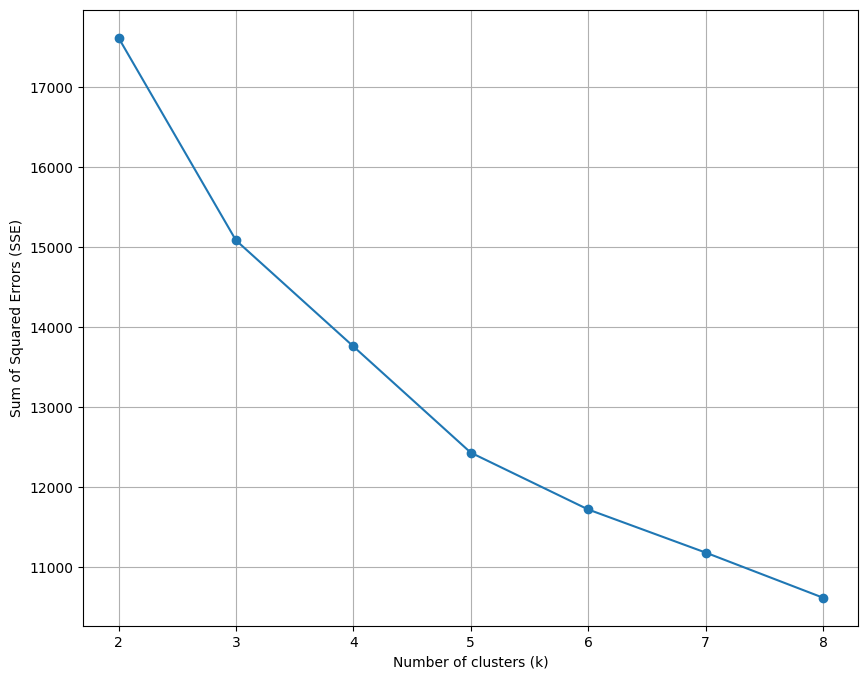

In [39]:
k_values = [2, 3, 4, 5, 6, 7, 8]
sse = []

for k in k_values:
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 42, max_iter = 500)
    kmeans_model = kmeans.fit(X_normalized)
    sse.append(kmeans_model.inertia_)

plt.figure(figsize = (10, 8))
plt.plot(k_values, sse, marker = 'o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)

plt.show()

b. [1.5v] **According to the previous plot, how many underlying customer segments
(clusters) should there be? Explain based on the trade-off between the clusters and
inertia.**

blah blah blah

c. [1.5v] **Would _k_-modes be a better clustering approach? Explain why based on the
dataset features.**

blah blah blah

### 2)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
numeric_features = ["age", "balance"]

X_normalized = X.copy()
X_normalized[numeric_features] = StandardScaler().fit_transform((X[numeric_features]))

a. [1v] **Apply PCA to the data. How much variability is explained by the top 2
components?**

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components = 2)
pca.fit(X_normalized)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.29136067 0.23004442]


b. [1v] **Apply _k_-means clustering with `k=3` and `random_state=42` (all other
arguments as default) and use the original 8 features. Next, provide a scatterplot
according to the first 2 principal components. Can we clearly separate the clusters?
Justify.**

In [44]:
import seaborn as sns

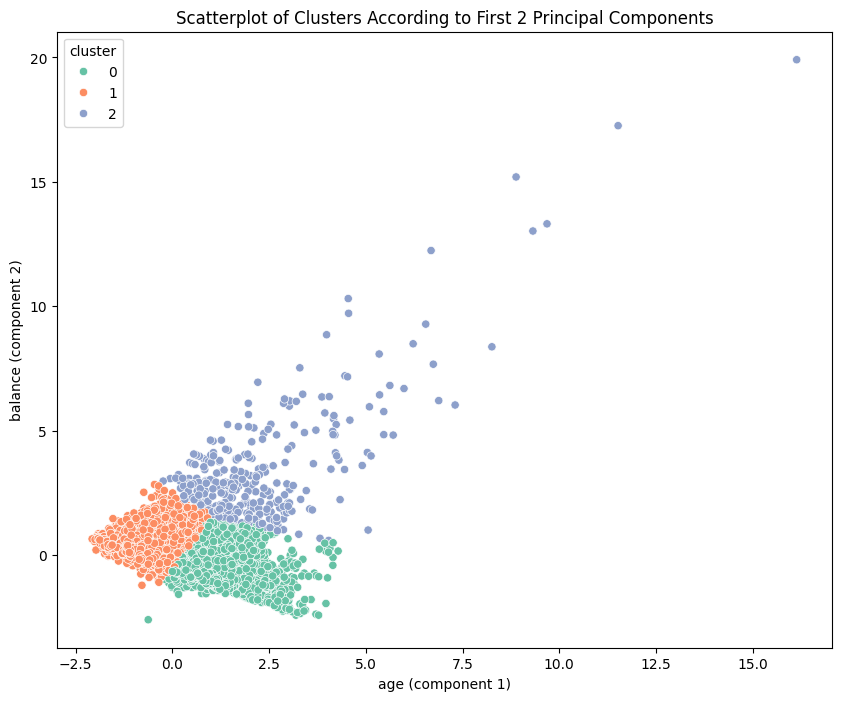

In [55]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
X["cluster"] = kmeans.fit_predict(X_normalized)  

pca = PCA(n_components = 2)
pca_components = pca.fit_transform(X_normalized)

selected_features = list(X_normalized.var().sort_values(ascending = False).head(2).index)


plt.figure(figsize = (10, 8))
sns.scatterplot(x = pca_components[:, 0], y = pca_components[:, 1], hue = X["cluster"], palette = "Set2")
plt.xlabel(selected_features[0] + " (component 1)")
plt.ylabel(selected_features[1] + " (component 2)")
plt.title("Scatterplot of Clusters According to First 2 Principal Components")

plt.show()


blah blah blah

c [2v] **Plot the cluster conditional features of the frequencies of “job” and ”education”
according to the clusters obtained in the previous question (2b.). Use _sns.distplot_
(see Data Exploration notebook), with `multiple="dodge"`, `stat='density'`,
`shrink=0.8` and `common_norm=False`. Describe the main differences between the
clusters in no more than half a page.**
